In [1]:
from osgeo import gdal
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

In [2]:
# define path to data dir and image files
data_dir   = pathlib.Path('/media/Data/FYS_3023/Radarsat-2').absolute()
VV_path    = data_dir / 'RS2-SLC-FQ6-ASC-02-Dec-2018_03.21-KNOS_23489393_Cal_dB_EC_VV.tif'

In [3]:
# read VV intensity
VV = gdal.Open(VV_path.as_posix()).ReadAsArray()

In [4]:
# multi-looking
window = 5
kernel = np.ones((window,window)) / (window**2)
VV_ML = convolve2d(VV, kernel, mode='same')

In [5]:
# set parameters for visualization
VV_min = -30
VV_max = 0

Text(0.5, 0, 'East (10m-pixel)')

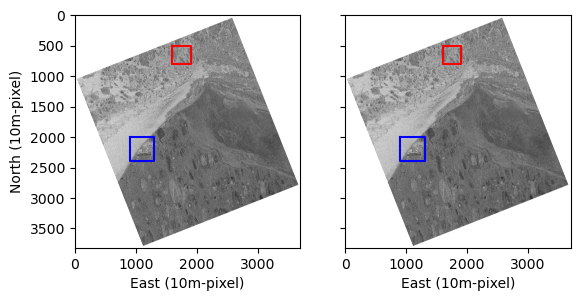

In [6]:
# display
fig, axes = plt.subplots(1,2,sharex=True,sharey=True)
axes = axes.ravel()
axes[0].imshow(
    VV,
    cmap='gray',
    vmin=VV_min,
    vmax=VV_max
)
axes[1].imshow(
    VV_ML,
    cmap='gray',
    vmin=VV_min,
    vmax=VV_max
)
axes[0].plot([1600,1900,1900,1600,1600],[500,500,800,800,500],'r')
axes[0].plot([900,1300,1300,900,900],[2000,2000,2400,2400,2000],'b')
axes[1].plot([1600,1900,1900,1600,1600],[500,500,800,800,500],'r')
axes[1].plot([900,1300,1300,900,900],[2000,2000,2400,2400,2000],'b')
axes[0].set_ylabel('North (10m-pixel)')
axes[0].set_xlabel('East (10m-pixel)')
axes[1].set_xlabel('East (10m-pixel)')
##plt.savefig('barrow_example_20181202_VV_intensities.png', dpi=300, transparent=True)

[]

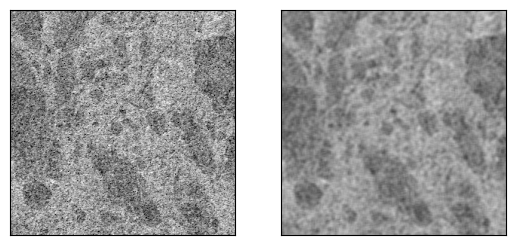

In [7]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True)
axes = axes.ravel()
axes[0].imshow(
    VV[500:800,1600:1900],
    cmap='gray',
    vmin=VV_min,
    vmax=VV_max
)
axes[1].imshow(
    VV_ML[500:800,1600:1900],
    cmap='gray',
    vmin=VV_min,
    vmax=VV_max
)
axes[0].set_xticks([])
axes[0].set_yticks([])
##plt.savefig('barrow_example_20181202_VV_intensities_ROI1.png', dpi=300, transparent=True)

[]

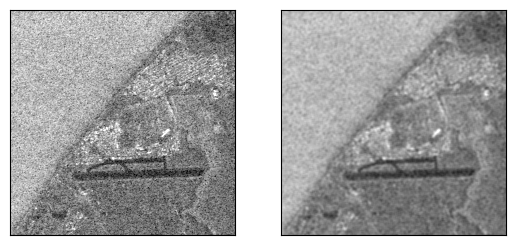

In [8]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True)
axes = axes.ravel()
axes[0].imshow(
    VV[2000:2400,900:1300],
    cmap='gray',
    vmin=VV_min,
    vmax=VV_max
)
axes[1].imshow(
    VV_ML[2000:2400,900:1300],
    cmap='gray',
    vmin=VV_min,
    vmax=VV_max
)
axes[0].set_xticks([])
axes[0].set_yticks([])
##plt.savefig('barrow_example_20181202_VV_intensities_ROI2.png', dpi=300, transparent=True)